In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
from glob import glob
import seaborn as sns
from PIL import Image

np.random.seed(42)
from keras.utils.np_utils import to_categorical # used for converting labels to one-hot-encoding
from sklearn.model_selection import train_test_split
from scipy import stats
from sklearn.preprocessing import LabelEncoder


In [2]:
skin_df = pd.read_csv('./dataset/HAM10000_metadata.csv')
print(skin_df)

         lesion_id      image_id     dx dx_type   age     sex localization
0      HAM_0000118  ISIC_0027419    bkl   histo  80.0    male        scalp
1      HAM_0000118  ISIC_0025030    bkl   histo  80.0    male        scalp
2      HAM_0002730  ISIC_0026769    bkl   histo  80.0    male        scalp
3      HAM_0002730  ISIC_0025661    bkl   histo  80.0    male        scalp
4      HAM_0001466  ISIC_0031633    bkl   histo  75.0    male          ear
...            ...           ...    ...     ...   ...     ...          ...
10010  HAM_0002867  ISIC_0033084  akiec   histo  40.0    male      abdomen
10011  HAM_0002867  ISIC_0033550  akiec   histo  40.0    male      abdomen
10012  HAM_0002867  ISIC_0033536  akiec   histo  40.0    male      abdomen
10013  HAM_0000239  ISIC_0032854  akiec   histo  80.0    male         face
10014  HAM_0003521  ISIC_0032258    mel   histo  70.0  female         back

[10015 rows x 7 columns]


In [3]:
SIZE=32

# label encoding to numeric values from text
le = LabelEncoder()
le.fit(skin_df['dx'])
LabelEncoder()
print(list(le.classes_))

['akiec', 'bcc', 'bkl', 'df', 'mel', 'nv', 'vasc']


In [4]:
skin_df['label'] = le.transform(skin_df["dx"]) 
print(skin_df.sample(10))


        lesion_id      image_id   dx    dx_type   age     sex  \
1617  HAM_0007180  ISIC_0033272  mel      histo  65.0    male   
8128  HAM_0007195  ISIC_0031923   nv      histo  40.0  female   
2168  HAM_0001835  ISIC_0026652  mel      histo  65.0    male   
1090  HAM_0000465  ISIC_0030583  bkl  consensus  35.0  female   
7754  HAM_0001720  ISIC_0034010   nv      histo  45.0    male   
8071  HAM_0006333  ISIC_0024424   nv      histo  35.0    male   
7423  HAM_0004548  ISIC_0032832   nv      histo  45.0  female   
8984  HAM_0006526  ISIC_0026671   nv      histo  55.0    male   
2310  HAM_0003102  ISIC_0032389  mel      histo  65.0    male   
7256  HAM_0004260  ISIC_0025525   nv      histo  65.0    male   

         localization  label  
1617             face      4  
8128  lower extremity      5  
2168             back      4  
1090            trunk      2  
7754          abdomen      5  
8071            trunk      5  
7423  upper extremity      5  
8984  lower extremity      5  
2310 

C:\Users\Amreen\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


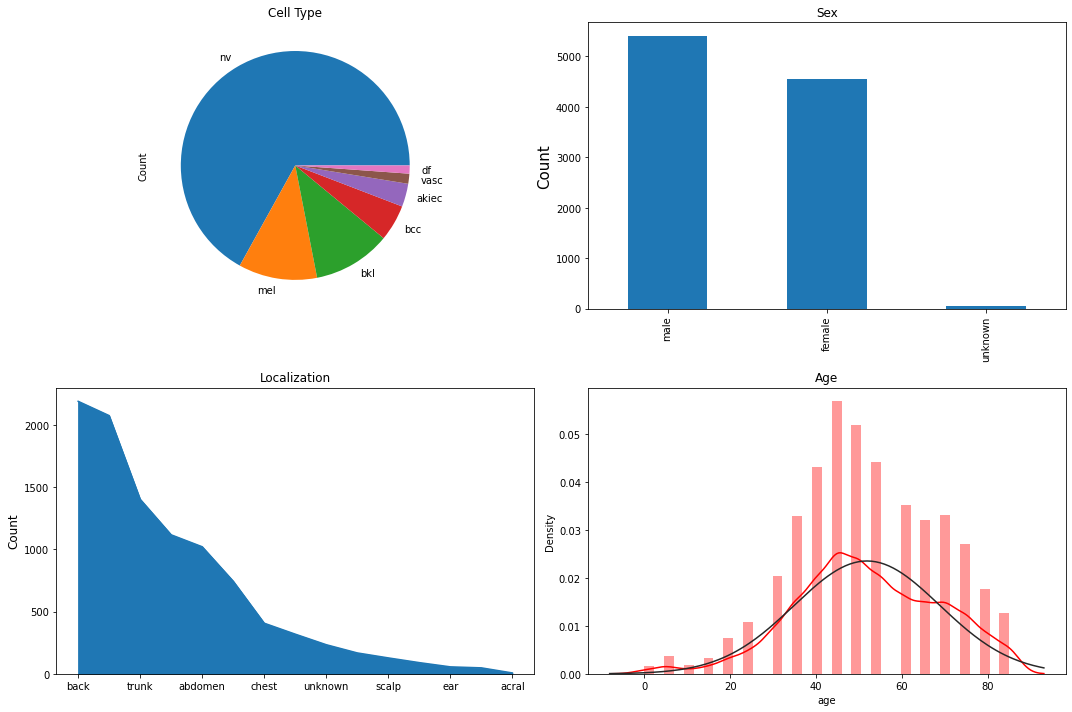

In [5]:
# Data distribution visualization
fig = plt.figure(figsize=(15,10))

ax1 = fig.add_subplot(221)
skin_df['dx'].value_counts().plot(kind='pie', ax=ax1)
ax1.set_ylabel('Count')
ax1.set_title('Cell Type');

ax2 = fig.add_subplot(222)
skin_df['sex'].value_counts().plot(kind='bar', ax=ax2)
ax2.set_ylabel('Count', size=15)
ax2.set_title('Sex');

ax3 = fig.add_subplot(223)
skin_df['localization'].value_counts().plot(kind='area')
ax3.set_ylabel('Count',size=12)
ax3.set_title('Localization')


ax4 = fig.add_subplot(224)
sample_age = skin_df[pd.notnull(skin_df['age'])]
sns.distplot(sample_age['age'], fit=stats.norm, color='red');
ax4.set_title('Age')

plt.tight_layout()
plt.show()



In [6]:
# Distribution of data into various classes 
from sklearn.utils import resample
print(skin_df['label'].value_counts())

#Balance data.
# Many ways to balance data... you can also try assigning weights during model.fit
#Separate each classes, resample, and combine back into single dataframe

df_0 = skin_df[skin_df['label'] == 0]
df_1 = skin_df[skin_df['label'] == 1]
df_2 = skin_df[skin_df['label'] == 2]
df_3 = skin_df[skin_df['label'] == 3]
df_4 = skin_df[skin_df['label'] == 4]
df_5 = skin_df[skin_df['label'] == 5]
df_6 = skin_df[skin_df['label'] == 6]


5    6705
4    1113
2    1099
1     514
0     327
6     142
3     115
Name: label, dtype: int64


In [7]:
n_samples=1000 
df_0_balanced = resample(df_0, replace=True, n_samples=n_samples, random_state=42) 
df_1_balanced = resample(df_1, replace=True, n_samples=n_samples, random_state=42) 
df_2_balanced = resample(df_2, replace=True, n_samples=n_samples, random_state=42)
df_3_balanced = resample(df_3, replace=True, n_samples=n_samples, random_state=42)
df_4_balanced = resample(df_4, replace=True, n_samples=n_samples, random_state=42)
df_5_balanced = resample(df_5, replace=True, n_samples=n_samples, random_state=42)
df_6_balanced = resample(df_6, replace=True, n_samples=n_samples, random_state=42)


In [8]:
skin_df_balanced = pd.concat([df_0_balanced, df_1_balanced, 
                              df_2_balanced, df_3_balanced, 
                              df_4_balanced, df_5_balanced, df_6_balanced])


In [9]:
print(skin_df_balanced)

        lesion_id      image_id     dx    dx_type   age     sex  \
9789  HAM_0003136  ISIC_0026645  akiec      histo  65.0    male   
9957  HAM_0006587  ISIC_0025780  akiec      histo  70.0    male   
9793  HAM_0005505  ISIC_0024450  akiec      histo  50.0    male   
9758  HAM_0003455  ISIC_0027896  akiec      histo  75.0    male   
9875  HAM_0005459  ISIC_0029268  akiec      histo  85.0    male   
...           ...           ...    ...        ...   ...     ...   
2366  HAM_0006946  ISIC_0032614   vasc      histo  55.0  female   
2330  HAM_0006617  ISIC_0028163   vasc      histo  25.0  female   
2449  HAM_0005427  ISIC_0028885   vasc  consensus  75.0    male   
2438  HAM_0001780  ISIC_0024370   vasc  consensus  55.0    male   
2459  HAM_0004257  ISIC_0025452   vasc  consensus  55.0  female   

         localization  label  
9789             back      0  
9957             face      0  
9793  upper extremity      0  
9758             hand      0  
9875  upper extremity      0  
...      

In [10]:
#Now time to read images based on image ID from the CSV file
#This is the safest way to read images as it ensures the right image is read for the right ID
print(skin_df_balanced['label'].value_counts())

0    1000
1    1000
2    1000
3    1000
4    1000
5    1000
6    1000
Name: label, dtype: int64


In [11]:
image_path = {os.path.splitext(os.path.basename(x))[0]: x
                     for x in glob(os.path.join('dataset/', '*', '*.jpg'))}

In [12]:
#Define the path and add as a new column
skin_df_balanced['path'] = skin_df['image_id'].map(image_path.get)

In [13]:
print(skin_df_balanced)

        lesion_id      image_id     dx    dx_type   age     sex  \
9789  HAM_0003136  ISIC_0026645  akiec      histo  65.0    male   
9957  HAM_0006587  ISIC_0025780  akiec      histo  70.0    male   
9793  HAM_0005505  ISIC_0024450  akiec      histo  50.0    male   
9758  HAM_0003455  ISIC_0027896  akiec      histo  75.0    male   
9875  HAM_0005459  ISIC_0029268  akiec      histo  85.0    male   
...           ...           ...    ...        ...   ...     ...   
2366  HAM_0006946  ISIC_0032614   vasc      histo  55.0  female   
2330  HAM_0006617  ISIC_0028163   vasc      histo  25.0  female   
2449  HAM_0005427  ISIC_0028885   vasc  consensus  75.0    male   
2438  HAM_0001780  ISIC_0024370   vasc  consensus  55.0    male   
2459  HAM_0004257  ISIC_0025452   vasc  consensus  55.0  female   

         localization  label                                             path  
9789             back      0  dataset\HAM10000_images_part_1\ISIC_0026645.jpg  
9957             face      0  datas

In [14]:
print(skin_df_balanced['path'])

9789    dataset\HAM10000_images_part_1\ISIC_0026645.jpg
9957    dataset\HAM10000_images_part_1\ISIC_0025780.jpg
9793    dataset\HAM10000_images_part_1\ISIC_0024450.jpg
9758    dataset\HAM10000_images_part_1\ISIC_0027896.jpg
9875    dataset\HAM10000_images_part_1\ISIC_0029268.jpg
                             ...                       
2366    dataset\HAM10000_images_part_2\ISIC_0032614.jpg
2330    dataset\HAM10000_images_part_1\ISIC_0028163.jpg
2449    dataset\HAM10000_images_part_1\ISIC_0028885.jpg
2438    dataset\HAM10000_images_part_1\ISIC_0024370.jpg
2459    dataset\HAM10000_images_part_1\ISIC_0025452.jpg
Name: path, Length: 7000, dtype: object


In [15]:
#Use the path to read images. Resize
skin_df_balanced['image'] = skin_df_balanced['path'].map(lambda x: np.asarray(Image.open(x).resize((SIZE,SIZE))))
print(skin_df_balanced['image'])

9789    [[[155, 118, 107], [162, 126, 118], [174, 140,...
9957    [[[138, 76, 82], [131, 64, 68], [139, 73, 81],...
9793    [[[123, 86, 87], [174, 137, 137], [197, 161, 1...
9758    [[[205, 149, 175], [207, 149, 169], [214, 158,...
9875    [[[203, 174, 199], [205, 174, 197], [206, 175,...
                              ...                        
2366    [[[145, 108, 110], [151, 112, 114], [156, 117,...
2330    [[[203, 172, 170], [204, 174, 169], [204, 175,...
2449    [[[179, 88, 100], [184, 93, 106], [191, 103, 1...
2438    [[[206, 133, 135], [207, 133, 134], [209, 133,...
2459    [[[221, 151, 175], [223, 154, 176], [223, 152,...
Name: image, Length: 7000, dtype: object


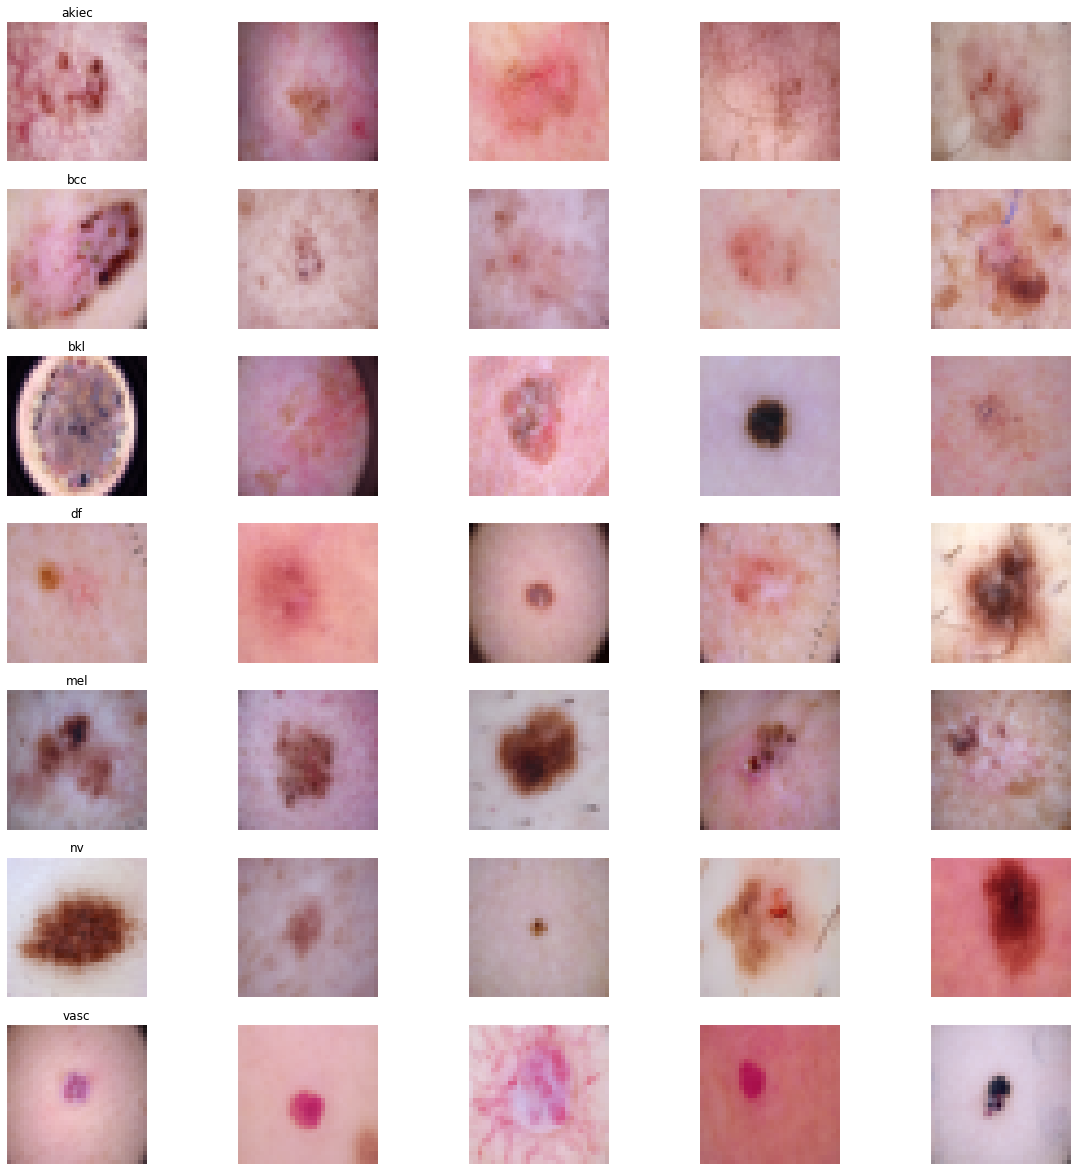

In [16]:
n_samples = 5  

# Plot
fig, m_axs = plt.subplots(7, n_samples, figsize = (4*n_samples, 3*7))
#see
for n_axs, (type_name, type_rows) in zip(m_axs, 
                                         skin_df_balanced.sort_values(['dx']).groupby('dx')):
    n_axs[0].set_title(type_name)
    for c_ax, (_, c_row) in zip(n_axs, type_rows.sample(n_samples, random_state=1234).iterrows()):
        c_ax.imshow(c_row['image'])
        c_ax.axis('off')

In [17]:
#Convert dataframe column of images into numpy array
X = np.asarray(skin_df_balanced['image'].tolist())
X = X/255. # Scale values to 0-1. You can also used standardscaler or other scaling methods.
#print(X)
Y=skin_df_balanced['label'] #Assign label values to Y
Y_cat = to_categorical(Y, num_classes=7) #Convert to categorical as this is a multiclass classification problem
#Split to training and testing. Get a very small dataset for training as we will be 
# fitting it to many potential models. 
print(Y_cat)
x_train, x_test, y_train, y_test = train_test_split(X, Y_cat, test_size=0.2, random_state=42)


[[1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 1.]]


In [18]:
num_classes = 7
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization

model = Sequential()
model.add(Conv2D(256, (3, 3), activation="relu", input_shape=(SIZE, SIZE, 3)))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(128, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))

model.add(Conv2D(64, (3, 3),activation='relu'))
#model.add(BatchNormalization())
model.add(MaxPool2D(pool_size=(2, 2)))  
model.add(Dropout(0.3))
model.add(Flatten())

model.add(Dense(32))
model.add(Dense(7, activation='softmax'))
model.summary()

model.compile(loss='categorical_crossentropy', optimizer='Adam', metrics=['acc'])



Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 30, 30, 256)       7168      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 15, 15, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 15, 15, 256)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 13, 13, 128)       295040    
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 128)         0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 6, 6, 128)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 4, 4, 64)          7

In [19]:
batch_size = 16 
epochs = 100
#what is batch size?
history = model.fit(
    x_train, y_train,
    epochs=epochs,
    batch_size = batch_size,
    validation_data=(x_test, y_test),
    verbose=2)

score = model.evaluate(x_test, y_test)
print('Test accuracy:', score[1])

Epoch 1/100
350/350 - 55s - loss: 1.8237 - acc: 0.2348 - val_loss: 1.5748 - val_acc: 0.3429
Epoch 2/100
350/350 - 54s - loss: 1.5174 - acc: 0.3755 - val_loss: 1.4382 - val_acc: 0.4200
Epoch 3/100
350/350 - 54s - loss: 1.3977 - acc: 0.4489 - val_loss: 1.3538 - val_acc: 0.4579
Epoch 4/100
350/350 - 55s - loss: 1.3021 - acc: 0.4829 - val_loss: 1.3313 - val_acc: 0.4700
Epoch 5/100
350/350 - 54s - loss: 1.2516 - acc: 0.5039 - val_loss: 1.2403 - val_acc: 0.5200
Epoch 6/100
350/350 - 53s - loss: 1.1981 - acc: 0.5320 - val_loss: 1.2378 - val_acc: 0.4879
Epoch 7/100
350/350 - 53s - loss: 1.1538 - acc: 0.5527 - val_loss: 1.2100 - val_acc: 0.5393
Epoch 8/100
350/350 - 54s - loss: 1.1292 - acc: 0.5641 - val_loss: 1.1049 - val_acc: 0.5871
Epoch 9/100
350/350 - 53s - loss: 1.0728 - acc: 0.5870 - val_loss: 1.1041 - val_acc: 0.5736
Epoch 10/100
350/350 - 47s - loss: 1.0481 - acc: 0.5984 - val_loss: 1.0203 - val_acc: 0.6271
Epoch 11/100
350/350 - 47s - loss: 1.0237 - acc: 0.5993 - val_loss: 0.9753 - va

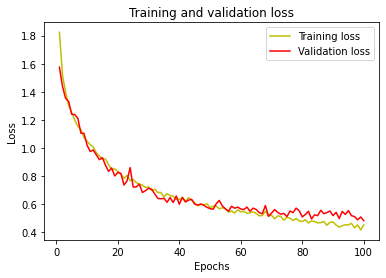

In [20]:
#plot the training and validation accuracy and loss at each epoch
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

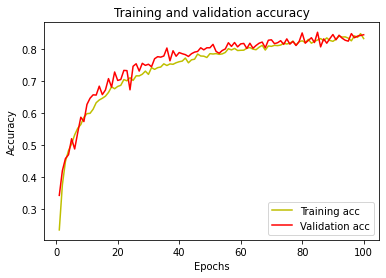

In [21]:
acc = history.history['acc']
val_acc = history.history['val_acc']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [22]:
# Prediction on test data
y_pred = model.predict(x_test)
# Convert predictions classes to one hot vectors 
y_pred_classes = np.argmax(y_pred, axis = 1) 
# Convert test data to one hot vectors
y_true = np.argmax(y_test, axis = 1) 


In [23]:
from sklearn.metrics import confusion_matrix
#Print confusion matrix
cm = confusion_matrix(y_true, y_pred_classes)

In [24]:
print(cm)

[[180  10   5   2   6   0   0]
 [ 11 200   9   3   0   1   0]
 [  5  13 129   1  12  16   2]
 [  0   0   0 215   0   0   0]
 [  6   8  31   0 123  15   0]
 [  3  13  23   0  21 150   1]
 [  0   0   0   0   0   0 186]]


In [25]:
#Save the model
model.save('cifar_model.h5')